Based on the article: [Genetic Algorithm Implementation in Python](https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6)

**Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6**, where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)

**Goal:** find the parameters (weights) that maximizes the equation above (Y). (What are the best values for the 6 weights w1 to w6?)

**Method:** The positive input is to be multiplied by the largest possible positive number and the negative number is to be multiplied by the smallest possible negative number. 

We are going to use the genetic algorithm for the best possible values after a number of generations.

**Idea to implement:** Implement Genetic Algorithm that can figure out on its own that it is better to use positive weight with positive inputs and negative weights with negative inputs. 


Genetic algorithm parameters:
* Mating pool size: `num_parents_mating`
* Population size: `pop_size`


In [15]:
import numpy
import ga
import matplotlib.pyplot

In [16]:
# Inputs of the equation (x)
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

# Number of solutions per population
sol_per_pop = 8

# Defining population size - The population will have sol_per_pop chromosome where each chromosome has num_weights genes
pop_size = (sol_per_pop, num_weights) 

# Creating the initial population
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
new_population

array([[-1.12802174, -0.40160817,  1.07298257,  3.73091517, -2.86461907,
        -3.26205351],
       [-0.10841968,  0.91789181,  0.8647222 , -0.85567438, -3.91021756,
        -0.9551151 ],
       [ 3.38210185, -0.62993704, -0.06106256,  1.87993017, -1.93004046,
         1.35530524],
       [-2.91548729, -2.88586331,  2.00951888,  3.29087731,  3.19556027,
        -1.88595127],
       [ 2.65660641, -0.87831051,  1.89856772,  1.36662307,  2.42449743,
         2.59199354],
       [ 1.74766972,  2.47419366,  0.50199725, -0.58857581, -0.24072255,
        -0.90973083],
       [ 2.77585649,  3.71163873,  2.95417589, -3.68321833,  3.65911614,
        -2.73483522],
       [ 1.6833716 , -3.66335734, -1.146536  ,  0.18928829,  2.95137509,
         1.23012093]])

In [18]:
best_outputs = []

# Number of generations
num_generations = 5

# Mating pool size
num_parents_mating = 4 

for generation in range(num_generations):
    
    print("Generation : ", generation)

    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0],num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover)
    print("Mutation")
    print(offspring_mutation)
    
    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


Generation :  0
Fitness
[ 65.5436055   43.98012758  38.83472385   7.78008581 -12.99069229
   7.78008581 -31.79287959 -27.25292785]
Best result :  65.54360550329677
Parents
[[-1.12802174 -0.40160817  1.07298257  3.73091517 -2.86461907 -3.26205351]
 [-0.10841968  0.91789181  0.8647222  -0.85567438 -3.91021756 -0.9551151 ]
 [ 3.38210185 -0.62993704 -0.06106256  1.87993017 -1.93004046  1.35530524]
 [ 1.74766972  2.47419366  0.50199725 -0.58857581 -0.24072255 -0.90973083]]
Crossover
[[-1.12802174 -0.40160817  1.07298257 -0.85567438 -3.91021756 -0.9551151 ]
 [-0.10841968  0.91789181  0.8647222   1.87993017 -1.93004046  1.35530524]
 [ 3.38210185 -0.62993704 -0.06106256 -0.58857581 -0.24072255 -0.90973083]
 [ 1.74766972  2.47419366  0.50199725  3.73091517 -2.86461907 -3.26205351]]
Mutation
[[-1.12802174 -0.40160817  1.07298257 -0.85567438 -3.91021756 -1.44504532]
 [-0.10841968  0.91789181  0.8647222   1.87993017 -1.93004046  0.8636187 ]
 [ 3.38210185 -0.62993704 -0.06106256 -0.58857581 -0.2407

In [19]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[ 1.74766972  2.47419366  0.50199725  3.73091517 -2.86461907
   -6.07374893]]]
Best solution fitness :  [82.51128751]


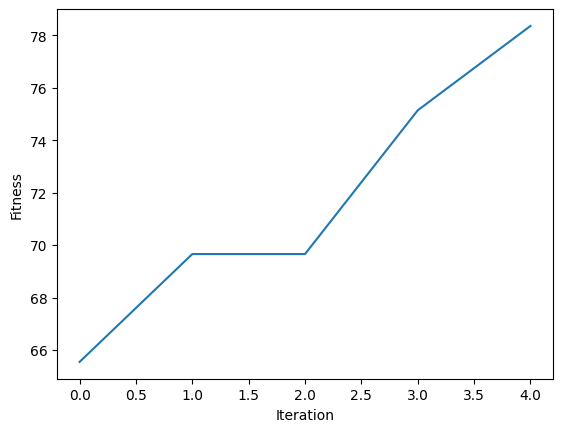

In [20]:
# Visualise the evolution on a line chart
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()